# Parameter Optimisation for Three-Dimensional Printers’ Print Quality

Import the github repo:
`git clone https://github.com/tapashreepradhan/semester-project-H02V8a.git`

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## 1. Data Loading and Distribution Plots of the Dependent Variables:

Preliminary data visualization of the experimental values via normal distribution curves.

In [3]:
df = pd.read_csv("3d-printer-dataset-two-level.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   layer_height (A)         48 non-null     float64
 1   nozzle temperature (B)   48 non-null     int64  
 2   bed_temperature (C)      48 non-null     int64  
 3   fan_speed (D)            48 non-null     int64  
 4   roughness                48 non-null     int64  
 5   tension_strength         48 non-null     float64
 6   elongation               48 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.8 KB


In [5]:
# independent variables
x_df = df.iloc[:, [0, 1, 2, 3]]
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   layer_height (A)         48 non-null     float64
 1   nozzle temperature (B)   48 non-null     int64  
 2   bed_temperature (C)      48 non-null     int64  
 3   fan_speed (D)            48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [6]:
# dependent variables
y_df = df.iloc[:, [4, 5, 6]]
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   roughness         48 non-null     int64  
 1   tension_strength  48 non-null     float64
 2   elongation        48 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


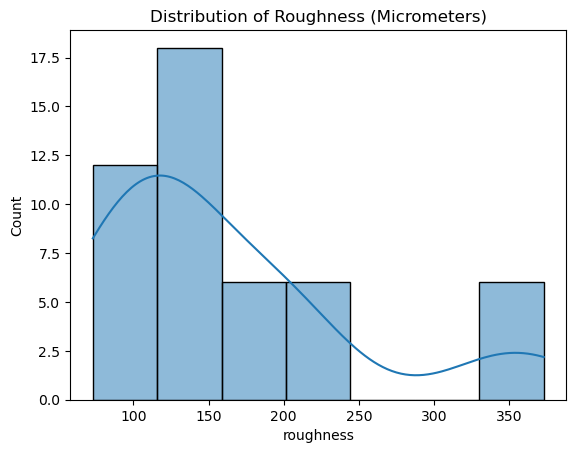

The data for Roughness does not appear to be normally distributed (p-value=0.0000)


<Figure size 640x480 with 0 Axes>

In [18]:
# Roughness Distribution

sns.histplot(y_df['roughness'], kde=True)
plt.title(f'Distribution of Roughness (Micrometers)')
plt.show()
plt.savefig('./distribution-plots/roughness-distribution.png')

from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(y_df['roughness'])
# Check the p-value
alpha = 0.05
if p_value > alpha:
    print(f'The data for Roughness appears to be normally distributed (p-value={p_value:.4f})')
else:
    print(f'The data for Roughness does not appear to be normally distributed (p-value={p_value:.4f})')

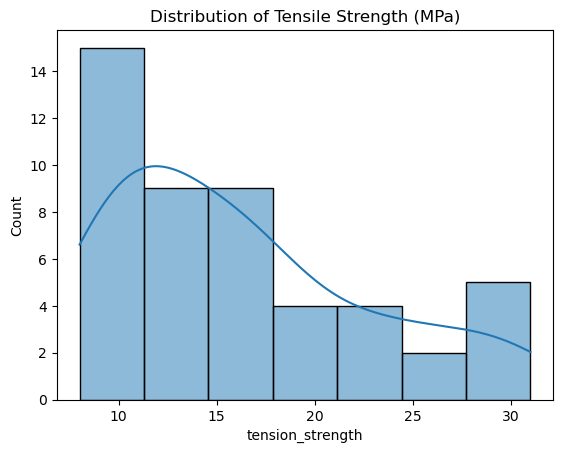

The data for Tensile Strength does not appear to be normally distributed (p-value=0.0007)


<Figure size 640x480 with 0 Axes>

In [19]:
# Tensile Strength Distribution

sns.histplot(y_df['tension_strength'], kde=True)
plt.title(f'Distribution of Tensile Strength (MPa)')
plt.show()

plt.savefig('./distribution-plots/tensile-distribution.png')

from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(y_df['tension_strength'])

# Check the p-value
alpha = 0.05
if p_value > alpha:
    print(f'The data for Tensile Strength appears to be normally distributed (p-value={p_value:.4f})')
else:
    print(f'The data for Tensile Strength does not appear to be normally distributed (p-value={p_value:.4f})')

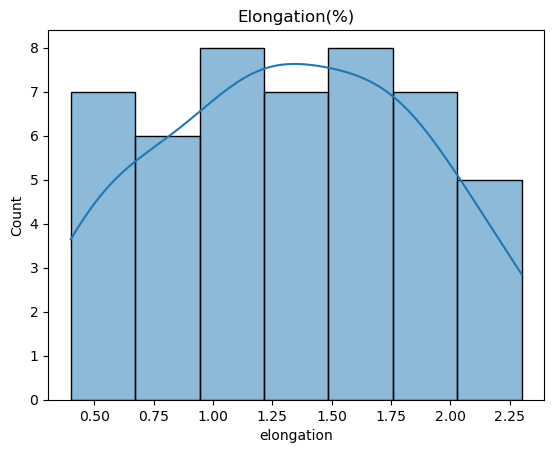

The data for Elongation appears to be normally distributed (p-value=0.1550)


<Figure size 640x480 with 0 Axes>

In [20]:
# Elongation Distribution

sns.histplot(y_df['elongation'], kde=True)
plt.title(f'Elongation(%)')
plt.show()
plt.savefig('./distribution-plots/elongation-distribution.png')
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(y_df['elongation'])

# Check the p-value
alpha = 0.05
if p_value > alpha:
    print(f'The data for Elongation appears to be normally distributed (p-value={p_value:.4f})')
else:
    print(f'The data for Elongation does not appear to be normally distributed (p-value={p_value:.4f})')

In [21]:
!git add -A
!git commit -m "distribution plots"
!git push -f origin

[main 4590a13] distribution plots
 6 files changed, 947 insertions(+), 401 deletions(-)
 create mode 100644 .ipynb_checkpoints/project-checkpoint.ipynb
 create mode 100644 .virtual_documents/project.ipynb
 create mode 100644 distribution-plots/elongation-distribution.png
 create mode 100644 distribution-plots/roughness-distribution.png
 create mode 100644 distribution-plots/tensile-distribution.png
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 4 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (8/8), 71.34 KiB | 7.93 MiB/s, done.
Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/tapashreepradhan/semester-project-H02V8a.git
   b06948e..4590a13  main -> main


- Note: 
Even though our response variables do not seem to be normally distributed, With a dataset size of 48 runs, the central limit theorem suggests that the distribution of sample means tends to be normal, even if the underlying data is not normally distributed. As a general guideline, t-tests and ANOVA can be reasonably robust to deviations from normality with moderate to large sample sizes. In this case, a sample size of 48 is often considered sufficiently large for these tests.
- t-tests:
With 48 observations, t-tests (both independent samples and paired samples) are generally robust, and the assumption of normality becomes less critical.
Welch's t-test, which is more robust to unequal variances, can be considered if the variances are not assumed to be equal.
- ANOVA:
For one-way ANOVA, a sample size of 48 is generally considered acceptable, and the ANOVA F-test is robust to deviations from normality, especially with relatively equal group sizes.
Two-way ANOVA may be reasonable with a balanced design and 48 observations.

## 2. Hypothesis Formulation:
To determine whether the coefficients and factors are of significance for the model and formulation of Null Hypothesis, $H_0$ and Alternative Hypothesis, $H_1$. - dont know how to do this

## 3. Elongation Only: Full Factorial

### 3.1. Computing the estimates of the effects and their standard errors

- k (Number of Groups or Combinations): represents the number of unique combinations of the 4 factors at 2 levels each. Since each factor has 2 levels and there are 4 factors, the total number of combinations would be. Therefore, "k" = 4

- n (Number of Replications or Sample Size): represents the number of replications or observations within each combination or group. In this case, each combination has been replicated 3 times. Therefore, "n" is 3

In [92]:
# Create a DataFrame with factor levels
factor_levels = {
    'layer_height (A)': ["0.05(-)", "0.1(+)"],
    'nozzle temperature (B)': ["220(-)", "240(+)"],
    'bed_temperature (C)': ["60(-)", "80(+)"],
    'fan_speed (D)': ["50(-)", "100(+)"]
}

# Generate all possible combinations of factor levels (full factorial design)
combinations = list(itertools.product(*factor_levels.values()))

# Create a DataFrame with the experimental design matrix
design_matrix = pd.DataFrame(combinations, columns=factor_levels.keys())

In [155]:
response_elg = df.iloc[:, [0, 1, 2, 3, 6]]

In [156]:
response_elg.to_csv('./datasets/' + 'elongation.csv', index=False)

In [157]:
# Create a custom grouping column
response_elg['Group'] = (response_elg.index // 3) + 1

# Sum every three lines using groupby and agg
result = response_elg.groupby('Group')['elongation'].agg('sum').reset_index(drop=True)

In [158]:
merged_y0 = pd.merge(design_matrix, result, left_index=True, right_index=True, how='inner')
print(merged_y0)

   layer_height (A) nozzle temperature (B) bed_temperature (C) fan_speed (D)  \
0           0.05(-)                 220(-)               60(-)         50(-)   
1           0.05(-)                 220(-)               60(-)        100(+)   
2           0.05(-)                 220(-)               80(+)         50(-)   
3           0.05(-)                 220(-)               80(+)        100(+)   
4           0.05(-)                 240(+)               60(-)         50(-)   
5           0.05(-)                 240(+)               60(-)        100(+)   
6           0.05(-)                 240(+)               80(+)         50(-)   
7           0.05(-)                 240(+)               80(+)        100(+)   
8            0.1(+)                 220(-)               60(-)         50(-)   
9            0.1(+)                 220(-)               60(-)        100(+)   
10           0.1(+)                 220(-)               80(+)         50(-)   
11           0.1(+)                 220(

In [487]:
one = result[0]
a = result[1]
b = result[2]
ab = result[3]
c = result[4]
ac = result[5]
bc = result[6]
abc = result[7]
d = result[8]
ad = result[9]
bd = result[10]
abd = result[11]
cd = result[12]
acd = result[13]
bcd = result[14]
abcd = result[15]

In [598]:
n = 3
k = 4
N = 1/(2*4)

In [599]:
A = (N * (abcd + bcd + acd + cd + abd + bd + ad + d - one - a - b - ab - c - ac - bc - abc))
B = (N * (c+ac+bc+abc+cd+acd+bcd+abcd - one - a - b - ab - d - ad - bd - abd))
C = (N * (-one -a +b +ab -c -ac +bc +abc -d -ad +bd +abd -cd -acd +bcd +abcd))
D = (N * (-one +a -b +ab -c +ac -bc +abc -d +ad -bd +abd -cd +acd -bcd +abcd))
AB = (N * (one +a +b +ab -c -ac -bc -abc -d -ad -bd -abd +cd +acd +bcd +abcd))
AC = (N * (one +a -b -ab +c +ac -bc -abc -d -ad +bd +abd -cd -acd +bcd +abcd))
AD = (N * (one -a +b -ab +c -ac +bc -abc -d +ad -bd +abd -cd +acd -bcd +abcd))
BC = (N * (one +a -b -ab -c -ac +bc +abc +d +ad -bd -abd -cd -acd +bcd +abcd))
BD = (N * (one -a +b -ab -c +ac -bc +abc +d -ad +bd -abd -cd +acd -bcd +abcd))
CD = (N * (one -a -b +ab +c -ac -bc +abc +d -ad -bd +abd +cd -acd -bcd +abcd))
ABC = (N * (-one -a +b +ab +c +ac -bc -abc +d +ad -bd -abd -cd -acd +bcd +abcd))
ABD = (N * (-one +a -b +ab +c -ac +bc -abc +d -ad +bd -abd -cd +acd -bcd +abcd))
ACD = (N * (-one +a +b -ab -c +ac +bc -abc +d -ad -bd +abd +cd -acd -bcd +abcd))
BCD = (N * (-one +a +b -ab +c -ac -bc +abc -d +ad +bd -abd +cd -acd -bcd +abcd))
ABCD = (N * (one -a -b +ab -c +ac +bc -abc -d +ad +bd -abd +cd -acd -bcd +abcd))

### 3.2. Coefficient Estimates:

In [600]:
effects = {'effect estimate': [A, B, C, D, AB, AC, AD, BC, BD, CD, ABC, ABD, ACD, BCD, ABCD]}
factorial_effect = pd.DataFrame(effects)
coeff_estimate = factorial_effect/2
coeff_estimate.rename(columns={'effect estimate':'coeff_estimate'}, inplace=True)
# 3.9725 - grand average of all the observations
new_row = pd.DataFrame({'coeff_estimate': [3.9725]})
coeff_estimate = pd.concat([new_row, coeff_estimate], ignore_index=True)
coeff_estimate

,coeff_estimate
0,3.9725
1,-0.1900
2,-0.1025
3,-0.4850
4,-0.0775
5,-0.6400
6,-0.0975
7,-0.1650
8,-0.9100
9,-0.5525


### 3.3. Standard Error of Coefficient:

In [601]:
# Given coefficient estimates
#coeff_estimates = np.array([385.333333/2, 458.000000/2, 708.666667/2, 76.000000/2, 295.333333/2,
#                            160.666667/2, 222.666667/2, 786.666667/2, 175.333333/2, -218.000000/2,
#                            297.333333/2, -96.666667/2, 26.000000/2, 156.000000/2, -93.333333/2])
coeff_estimates = np.array(coeff_estimate.values)
n = len(coeff_estimates)
result_mean = np.mean(result)
sigma_hat_squared_i = np.array(np.sum((coeff_estimates - x_mean) ** 2) / (n - 1))
sigma_hat_squared = np.sum(sigma_hat_squared_i/(2**k))
se_Effect = np.sqrt(sigma_hat_squared/(n*2**(k-2)))

In [602]:
print('se_effect:',se_Effect, 'constant:',result_mean, 'se_coeff:',se_Effect/2)

se_effect: 0.13023515140490424 constant: 3.9725 se_coeff: 0.06511757570245212


### 3.4. t-ratios

In [603]:
t_ratios = factorial_effect/se_Effect
t_ratios.rename(columns={'effect estimate':'t-ratios'}, inplace=True)

In [604]:
new_row = pd.DataFrame({'t-ratios': [2*3.9725/se_Effect]})
t_ratios = pd.concat([new_row, t_ratios], ignore_index=True)

In [605]:
alpha = 0.025
# degrees of freedom = 2^4.3 = 48
def P(t_ratios):
    t = st.t(df=47)
    return 2 * (1 - t.cdf(abs(t_ratios)))

# Apply the P function to each row in the DataFrame
P_value = t_ratios.apply(P)

# Check significance for each t-ratio
Significance = P_value < alpha

# Print the results
print('DataFrame with P values and significance:')
print(Significance)

DataFrame with P values and significance:
    t-ratios
0       True
1       True
2      False
3       True
4      False
5       True
6      False
7       True
8       True
9       True
10      True
11     False
12      True
13      True
14     False
15      True


hence we can conclude that effect of D, AC, ABC and BCD are not significant and can reduce our regression model coefficients. 

### 3.5. Linear Regression Model:

model(result_mean, x1, x2, x3, x4) = result_mean + (A/2)*x1 + (B/2)*x2 + (C/2)*x3 + (AB/2)*x1*x2 + (AD/2)*x1*x4 + (BC/2)*x2*x3 + (BD/2)*x2*x4 + (CD/2)*x3*x4 + (ABD/2)*x1*x3*x4 + (ACD/2)*x1*x3*x4 + (ABCD/2)*x1*x2*x3*x4

#### a. From Scikit-Learn Library

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# factor_levels = {
#     'x1': [0.05, 0.1],
#     'x2': [220, 240],
#     'x3': [60, 80],
#     'x4': [50, 100]
# }

# # Generate all possible combinations of factor levels (full factorial design)
# combinations = list(itertools.product(*factor_levels.values()))

# # Create a DataFrame with the experimental design matrix
# X = pd.DataFrame(combinations, columns=factor_levels.keys())

In [364]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,[0,1,2,3]], df.iloc[:,[6]], test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Printing coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("R-squared:", metrics.r2_score(y_test, y_pred))

Coefficients: [[-8.36438923e-01 -9.27587992e-03 -1.90543478e-02 -7.10351967e-04]]
Intercept: [4.94880952]
Mean Absolute Error: 0.42199171842650146
Mean Squared Error: 0.24698992567159225
R-squared: -0.23742447731258665


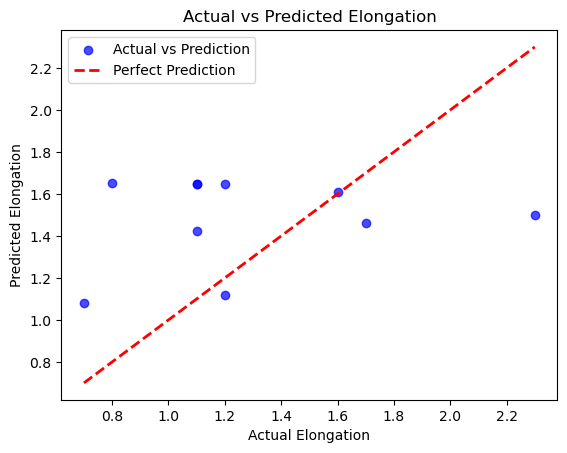

In [365]:
# Visualize the predictions vs actual values
# Scatter plot
plt.scatter(y_test, y_pred, label='Actual vs Prediction', color='blue', alpha=0.7)

# Diagonal line for reference
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# Add legends
plt.legend()

# Labels and title
plt.xlabel('Actual Elongation')
plt.ylabel('Predicted Elongation')
plt.title('Actual vs Predicted Elongation')

# Show the plot
plt.show()

#### b. From the model that we've found out via statistical analysis

In [606]:
coeff_estimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   coeff_estimate  16 non-null     float64
dtypes: float64(1)
memory usage: 260.0 bytes


In [607]:
# Extract coefficients from the DataFrame
constant = coeff_estimate.loc[0, 'coeff_estimate']
A = coeff_estimate.loc[1, 'coeff_estimate']
B = coeff_estimate.loc[2, 'coeff_estimate']
C = coeff_estimate.loc[3, 'coeff_estimate']
D = coeff_estimate.loc[4, 'coeff_estimate']
AB = coeff_estimate.loc[5, 'coeff_estimate']
AC = coeff_estimate.loc[6, 'coeff_estimate']
AD = coeff_estimate.loc[7, 'coeff_estimate']
BC = coeff_estimate.loc[8, 'coeff_estimate']
BD = coeff_estimate.loc[9, 'coeff_estimate']
CD = coeff_estimate.loc[10, 'coeff_estimate']
ABC = coeff_estimate.loc[11, 'coeff_estimate']
ABD = coeff_estimate.loc[12, 'coeff_estimate']
ACD = coeff_estimate.loc[13, 'coeff_estimate']
BCD = coeff_estimate.loc[14, 'coeff_estimate']
ABCD = coeff_estimate.loc[15, 'coeff_estimate']

In [608]:
X = df.iloc[:,[0,1,2,3]]

In [609]:
X.rename(columns={'layer_height (A)':'x1', 'nozzle temperature (B) ':'x2','bed_temperature (C) ':'x3', 'fan_speed (D)':'x4'}, inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      48 non-null     float64
 1   x2      48 non-null     int64  
 2   x3      48 non-null     int64  
 3   x4      48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [610]:
Y = df.iloc[:,[6]]
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   elongation  48 non-null     float64
dtypes: float64(1)
memory usage: 516.0 bytes


In [611]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Calculate predicted values for testing set
y_test_pred = (
    (constant +
    A * X_test['x1'] +
    #B * X_test['x2'] +
    C * X_test['x3'] +
    #D * X_test['x4'] + 
    AB * X_test['x1'] * X_test['x2'] +
    #AC * X_test['x1'] * X_test['x3'] + 
    AD * X_test['x1'] * X_test['x4'] +
    BC * X_test['x2'] * X_test['x3'] +
    BD * X_test['x2'] * X_test['x4'] +
    CD * X_test['x3'] * X_test['x4'] +
    #ABC * X_test['x1'] * X_test['x2'] * X_test['x3'] + 
    ABD * X_test['x1'] * X_test['x2'] * X_test['x4'] +
    ACD * X_test['x1'] * X_test['x3'] * X_test['x4'] +
    #BCD * X_test['x2'] * X_test['x3'] * X_test['x4'] + 
    ABCD * X_test['x1'] * X_test['x2'] * X_test['x3'] * X_test['x4'])/100000
)

### 3.6. Analysis Of Variance:

In [613]:
# Error sum of squares (SS_E)
residual = y_test['elongation'] - y_test_pred
SS_E = np.sum((residual)**2)
print("Eror Sum of Squares (SS_E):", SS_E)
# dof = n - p; n = total observations = 48 - 11
print("Mean Square:", SS_E/37)

Eror Sum of Squares (SS_E): 10.584839452029629
Mean Square: 0.2860767419467467


In [614]:
# Regression sum of squares (SS_R)
SS_R = np.sum((y_test_pred - np.mean(y_test))**2)
print("Sum of Squares Regression(SS_R):", SS_R)
# dof = parameters - 1 = 11 - 1
print("Mean Square:", SS_R/10)

Sum of Squares Regression(SS_R): 7.9165456417096305
Mean Square: 0.791654564170963


In [615]:
# Total sum of squares (SS_E)
SS_T = SS_E + SS_R
print("Sum of Squares Error(SS_T):", SS_T)
# dof = n - 1 = 48 - 1 = 47
print("Mean Square:", SS_T/47)

Sum of Squares Error(SS_T): 18.50138509373926
Mean Square: 0.3936464913561544


In [616]:
r2 = SS_R/SS_T
print(r2)

0.4278893499918844


Since SS_E (Sum of Squares Error) is larger than SS_R (Sum of Squares Model), it suggests that the model is not effectively explaining the variability in the dependent variable. In other words, a larger proportion of the total variability in the dependent variable is unaccounted for by your regression model.

In a well-fitted model, SSm is expected to be larger than SS_E, indicating that the model is capturing a significant portion of the total variability in the dependent variable. However, if SS_E is larger than SS_R, it may suggest that the model is not providing a good fit to the data, and there is substantial unexplained variability.

Possible reasons for this situation include:

- Model inadequacy: The chosen model may not be appropriate for the data, and there might be missing predictors or nonlinear relationships that the model cannot capture.

- Outliers or influential data points: Extreme values in the data may be having a large impact on the residuals, affecting the overall fit of the model.

- Violations of assumptions: The assumptions of linear regression, such as linearity, independence, and homoscedasticity, may be violated.

- Overfitting: The model might be too complex for the given dataset, leading to overfitting and poor generalization to new data.

In our case, it is definitely overfitting.

## 4. Elongation Only: Fractional Factorial

The $2^4-1$ Design with Defininig Relation I = ABCD
### 4.1. Treatment Combinations of Effects

In [617]:
# treatment combination 
A_BCD = 1/4 * (-one +ad -bd +ab -cd +ac -bc + abcd)
B_ACD = 1/4 * (-one -ad +bd +ab -cd -ac +bc + abcd)
C_ABD = 1/4 * (-one -ad -bd -ab +cd +ac +bc + abcd)
D_ABC = 1/4 * (-one +ad +bd -ab +cd -ac -bc + abcd)
AB_CD = 1/4 * (+one -ad -bd +ab +cd -ac -bc + abcd)
AC_BD = 1/4 * (+one -ad +bd -ab -cd +ac -bc + abcd)
AD_BC = 1/4 * (+one +ad -bd -ab -cd -ac +bc + abcd)

### 4.2. Coeffecients of Fractional Effects

In [618]:
frac_effects = {'frac_eff':[A_BCD, B_ACD, C_ABD, D_ABC, AB_CD, AC_BD, AD_BC]}
frac_factorial = pd.DataFrame(frac_effects)
frac_coeff = frac_factorial/2
frac_coeff.rename(columns={'frac_eff':'frac_coeff'}, inplace=True)
# 3.9725 - grand average of all the observations
new_row = pd.DataFrame({'frac_coeff': [3.9725]})
frac_coeff = pd.concat([new_row, frac_coeff], ignore_index=True)
frac_coeff

,frac_coeff
0,3.9725
1,-0.1250
2,-0.2500
3,-0.5500
4,-0.2750
5,-0.3500
6,-0.6500
7,-1.0750


### 4.3. Standard Error of Fractional Coeff

In [621]:
k = 3
f_coeff = np.array(frac_coeff.values)
n = len(frac_coeff)
result_mean = np.mean(result)
sigma_hat_squared_i = np.array(np.sum((f_coeff - result_mean) ** 2) / (n - 1))
sigma_hat_squared = np.sum(sigma_hat_squared_i/(2**k))
f_se_Effect = np.sqrt(sigma_hat_squared/(n*2**(k-2)))

In [622]:
print('se_effect:',f_se_Effect, 'constant:',result_mean, 'se_coeff:',f_se_Effect/2)

se_effect: 0.3933629670267971 constant: 3.9725 se_coeff: 0.19668148351339854


### 4.4. Fractional t-ratios

In [624]:
frac_t = (2*frac_coeff)/f_se_Effect
frac_t.rename(columns={'frac_eff':'frac_t'}, inplace=True)
frac_t

,frac_coeff
0,20.197631
1,-0.635545
2,-1.271091
3,-2.796399
4,-1.398200
5,-1.779527
6,-3.304836
7,-5.465690


In [625]:
alpha = 0.025
# degrees of freedom = 2^4.3 = 48
def P(t_ratios):
    t = st.t(df=47)
    return 2 * (1 - t.cdf(abs(t_ratios)))

# Apply the P function to each row in the DataFrame
P_value = frac_t.apply(P)

# Check significance for each t-ratio
frac_Significance = P_value < alpha

# Print the results
print('DataFrame with P values and significance:')
print(frac_Significance)

DataFrame with P values and significance:
   frac_coeff
0        True
1       False
2       False
3        True
4       False
5       False
6        True
7        True


regression model = contant + (C_ABD/2)x3 + (AC_BD/2)x1x3 + (AD_BC/2)x1x4 

- Interpretetion:
Interactions involving factors A, B, and D (e.g., AB, AD, BD, ABD) are not explicitly present in Model2. This suggests that these interactions are confounded or combined with other effects, leading to a simplified model. The remaining interactions in Model2 involve factor C combined with various interactions (C+ABD, AC + BD, AD + BC). This suggests that factor C plays a significant role in these interactions. Model2 provides a more parsimonious representation of the system, focusing on the key interactions that are considered most influential in the response variable.

## 5. Response Surface Method: Second-Order Model Considered Only

In [626]:
X = df.iloc[:,[0,1,2,3]]
X.rename(columns={'layer_height (A)':'x1', 'nozzle temperature (B) ':'x2','bed_temperature (C) ':'x3', 'fan_speed (D)':'x4'}, inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      48 non-null     float64
 1   x2      48 non-null     int64  
 2   x3      48 non-null     int64  
 3   x4      48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [627]:
Y = df.iloc[:,[6]]
Y.rename(columns={'elongation':'y1'}, inplace = True)
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y1      48 non-null     float64
dtypes: float64(1)
memory usage: 516.0 bytes


In [631]:
x1 = X['x1'].values
x2 = X['x2'].values
x3 = X['x3'].values
x4 = X['x4'].values
y1 = Y['y1'].values

In [ ]:
M = np.vstack([np.ones(len(x1)), x1, x2, x3, x4, x1**2, x2**2, x3**2, x4**2, x1*x2, 
               x2*x3, x3*x4, x1*x4]).T
print(M)

In [636]:
beta = np.linalg.lstsq(M, y1, rcond=None)[0]
print(beta, len(beta))

[-3.48324396e-04  1.95925020e+02 -3.99801042e-02 -1.19086511e-02
 -1.16112529e-02  2.93887548e+01  6.80210371e-04  4.74577608e-03
 -6.59249809e-05 -8.53333333e-01 -3.03333333e-03  3.86666667e-04
 -8.80000000e-02] 13


In [639]:
def model(x1, x2, x3, x4, beta):
  return beta[0] + beta[1]*x1 + beta[2]*x2 + beta[3]*x3 + beta[4]*x4 + beta[5]*(x1**2) + beta[6]*(x2**2) + beta[7]*(x3**2) + beta[8]*(x4**2) + beta[9]*(x1*x2) + beta[10]*(x2*x3) + beta[11]*(x3*x4) + beta[12]*(x1*x4)

In [640]:
%matplotlib inline
yy= np.empty((100,100,100,100))
for i,xx_1 in enumerate(np.linspace(-np.sqrt(2),np.sqrt(2),100)):
    for j,xx_2 in enumerate(np.linspace(-np.sqrt(2),np.sqrt(2),100)):
        for k,xx_3 in enumerate(np.linspace(-np.sqrt(2),np.sqrt(2),100)):
            for l,xx_4 in enumerate(np.linspace(-np.sqrt(2),np.sqrt(2),100)):
                yy[i,j,k,l] = model(xx_1,xx_2,xx_3,xx_4, beta)

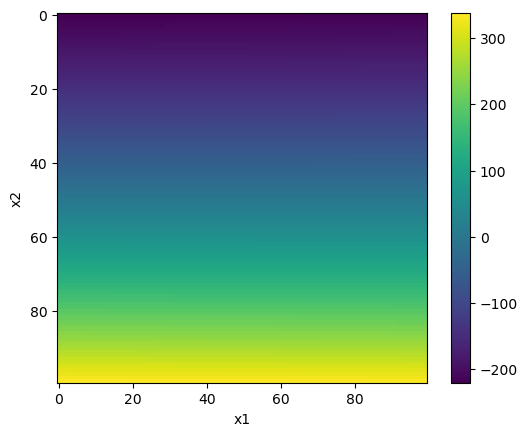

In [649]:
x1x2 = yy[:,:,0,0]
plt.imshow(x1x2, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

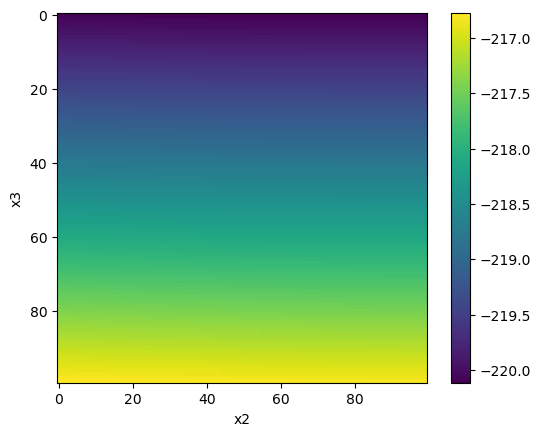

In [650]:
x2x3 = yy[0,:,:,0]
plt.imshow(x2x3, cmap='viridis')
plt.xlabel('x2')
plt.ylabel('x3')
plt.colorbar()
plt.show()

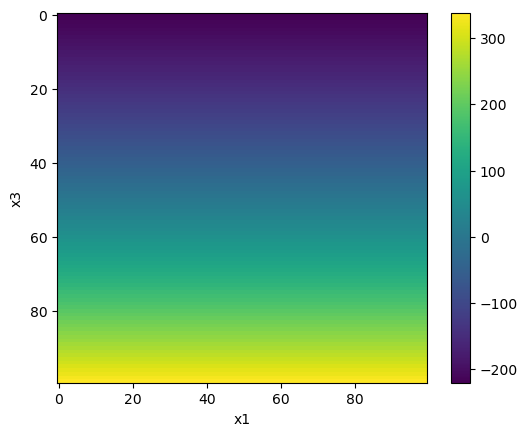

In [651]:
x1x3 = yy[:,0,:,0]
plt.imshow(x1x3, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x3')
plt.colorbar()
plt.show()

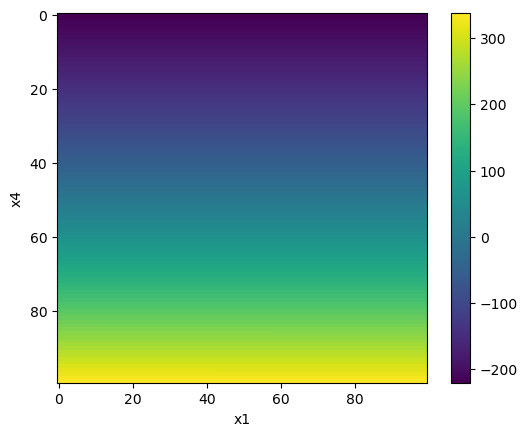

In [652]:
x1x4 = yy[:,0,0,:]
plt.imshow(x1x4, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x4')
plt.colorbar()
plt.show()